In [1]:
from simpleabc import simple_abc
import simple_model
import numpy as np
import pickle 
import pylab as plt
from scipy import stats
import time
%matplotlib inline
plt.style.use('ggplot')

In [29]:
np.random.seed(914)

steps = 5
eps = 0.25
min_part = 100

#stars = pickle.load(file('stars.pkl'))
stars = pickle.load(file('stars_trimmed.pkl'))
#obs = pickle.load(file('data.pkl'))

model = simple_model.MyModel(stars)
model.set_prior([stats.uniform(0.5, 1.0),
                stats.uniform(0, 1.0)])

#theta = (0.513265306122, 0.1)
theta = (0.75, 0.2)

obs = model.generate_data(theta)
model.set_data(obs)





n_procs = [1, 2, 3, 4, 5, 6, 7, 8]

start = time.time()
OT = simple_abc.pmc_abc(model, obs, epsilon_0=eps, min_particles=min_part, steps=steps,
                        target_epsilon=eps, parallel=False)
end = time.time()
print 'Serial took {}s'.format(end - start)
out_pickle = file('simptest.pkl', 'w')
pickle.dump(OT, out_pickle)
out_pickle.close()

0 0.25
1 0.201044780816
Effective sample size(s): [[ 101.  101.]]
2 0.173436319369
Effective sample size(s): [[ 101.  101.]]
3 0.128811369509
Effective sample size(s): [[ 101.  101.]]
4 0.0971485878463
Effective sample size(s): [[ 101.  101.]]
Serial took 284.091323137s


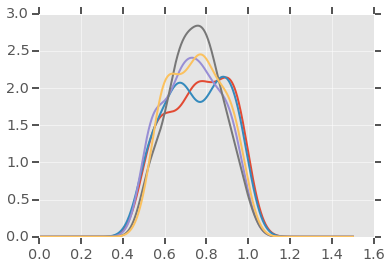

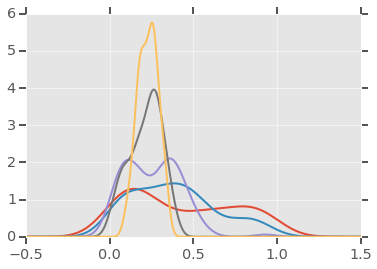

In [30]:
for P in OT:
    ker = stats.gaussian_kde([x[0] for x in P[0]])
    x = np.linspace(0.0,1.5,1000)
    plt.plot(x,ker(x))
plt.figure()
for P in OT:
    ker = stats.gaussian_kde([x[1] for x in P[0]])
    x = np.linspace(-0.5,1.5,1000)
    plt.plot(x,ker(x))

In [9]:
stats.ks_2samp?

In [25]:
for P in OT:
    print [x[0] for x in P[0]]

[0.652577749585935, 0.8194725175958422, 0.834188565964157, 0.629007094127977, 0.718328095656256, 0.9283407238621194, 0.7538155375160127, 0.87636051224826, 0.5371851941458528, 0.8014180939643896, 0.8529346428312304, 0.654209914887264, 0.9304191103855843, 0.5179797220256005, 0.5158724955680016, 0.7549602899380676, 0.5066702668961568, 0.9711792297299096, 0.99972943407637, 0.9512042422778354, 0.8481262470253359, 0.5974435628204413, 0.9751930231147089, 0.7377463208399272, 0.7749411555765456, 0.7482275543003555, 0.7584345166362194, 0.9030441345320265, 0.6119617196245435, 0.5955976841565357, 0.6948738760599517, 0.8663278540970901, 0.927434477662948, 0.7157044573350714, 0.8085992964628665, 0.8446733935310637, 0.9148532943000723, 0.7485849837610176, 0.5411622110554185, 0.8517019037701885, 0.7200850278205393, 0.9210295742298177, 0.7625699798222585, 0.5284654885429354, 0.7993984156233754, 0.5860472160430392, 0.742478147661321, 0.713260686411158, 0.8171466876141654, 0.9155652072455416, 0.740168745